paper:
- http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf

- supports different languages

In [13]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/sentiment_dataset.csv')

In [16]:
df

,Unnamed: 0,text,sentiment
0,0,Hello and hope you are doing well.Understand y...,neutral
1,1,It would be hard to see any significant abnorm...,neutral
2,2,"Hi James, I, too, go to bed by 10:00, then wa...",neutral
3,3,"Hi, I am suffering from the same sleep problem...",negative
4,4,"me too, it feels like its morning after 1hour",neutral
...,...,...,...
482,197,I just had a similar experience of feeling a d...,neutral
483,198,Thank you for posting. I saw starting to think...,negative
484,199,During an induced 4 week coma following a hear...,neutral
485,200,I have been doing his for years. especially at...,negative


In [17]:
df['text'] = df['text'].str.lower()

In [18]:
df.head()

,Unnamed: 0,text,sentiment
0,0,hello and hope you are doing well.understand y...,neutral
1,1,it would be hard to see any significant abnorm...,neutral
2,2,"hi james, i, too, go to bed by 10:00, then wa...",neutral
3,3,"hi, i am suffering from the same sleep problem...",negative
4,4,"me too, it feels like its morning after 1hour",neutral


In [54]:
from afinn import Afinn
from sklearn.metrics import accuracy_score, f1_score, classification_report
afinn = Afinn(emoticons=True) # 

def analyse(text, threshold):
  score = afinn.score(text)
  if score > threshold:
    return 'positive'
  elif score < threshold:
    return 'negative'
  else:
    return 'neutral'

f1_scores = []
accuracy = []
import numpy as np
for k in np.arange(0, 0.05, 0.005):
  predicted = df['text'].apply(lambda x : analyse(x, k))
  print(classification_report(df['sentiment'], predicted))
  break
  accuracy.append(accuracy_score(df['sentiment'], predicted))
  f1_scores.append(f1_score(df['sentiment'], predicted, average="weighted"))

              precision    recall  f1-score   support

    negative       0.48      0.60      0.53       142
     neutral       0.73      0.19      0.30       290
    positive       0.20      0.84      0.32        55

    accuracy                           0.38       487
   macro avg       0.47      0.54      0.38       487
weighted avg       0.60      0.38      0.37       487



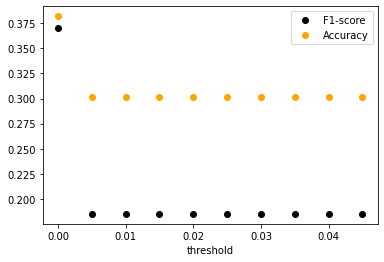

In [50]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 0.05, 0.005), f1_scores, 'o', color='black', label="F1-score")
plt.plot(np.arange(0, 0.05, 0.005), accuracy, 'o', color='orange', label="Accuracy")
plt.xlabel('threshold')
plt.legend(numpoints=1)


In [33]:
values = {-5:16, -4:47, -3:376, -2:1411, -1:354, 0:0, 1:604, 2:2043, 3:614, 4:116, 5:23}

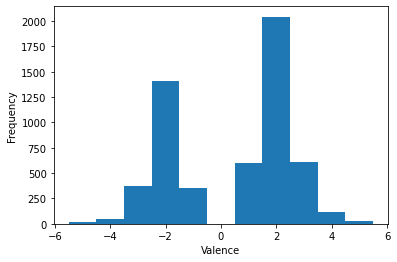

In [42]:
from matplotlib import pyplot as plt

plt.bar(values.keys(), values.values(), align='center', width=1)
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
#calculate the negative, positive, neutral and compound scores, plus verbal evaluation

def show_metrics(y_test, y_predicted):
  print(confusion_matrix(y_test, y_predicted))
  print(classification_report(y_test, y_predicted))


In [21]:
df[df['sentiment'] == 'negative']

,Unnamed: 0,text,sentiment,sentiment_scores
3,3,"hi, i am suffering from the same sleep problem...",negative,negative
11,11,i am having the exact same issue and no one ca...,negative,positive
12,12,i had a softball size inguinal hernia in augus...,negative,negative
16,16,i understand how you feel. my primary care do...,negative,positive
17,17,hi shielahi''ve started to taper my dosage of ...,negative,negative
...,...,...,...,...
480,195,"i have been experiencing similar issues, i hav...",negative,neutral
481,196,this is the first time that i have heard anyon...,negative,positive
483,198,thank you for posting. i saw starting to think...,negative,neutral
485,200,i have been doing his for years. especially at...,negative,neutral


In [22]:
show_metrics(df['sentiment'].tolist(), df['sentiment_scores'].tolist())

[[ 85  16  41]
 [ 88  55 147]
 [  5   4  46]]
              precision    recall  f1-score   support

    negative       0.48      0.60      0.53       142
     neutral       0.73      0.19      0.30       290
    positive       0.20      0.84      0.32        55

    accuracy                           0.38       487
   macro avg       0.47      0.54      0.38       487
weighted avg       0.60      0.38      0.37       487



In [23]:
accuracy_score(df['sentiment'].tolist(), df['sentiment_scores'].tolist())

0.38193018480492813

In [24]:
show_metrics(df['sentiment'].tolist(), df['sentiment_scores'].tolist())

[[ 85  16  41]
 [ 88  55 147]
 [  5   4  46]]
              precision    recall  f1-score   support

    negative       0.48      0.60      0.53       142
     neutral       0.73      0.19      0.30       290
    positive       0.20      0.84      0.32        55

    accuracy                           0.38       487
   macro avg       0.47      0.54      0.38       487
weighted avg       0.60      0.38      0.37       487

